# Theory: Neural Networks are Universal Function Approximators
It is a well-known result that neural networks can approximate any continuous function $ \mathbb{R}^n \to \mathbb{R}^m $. Even neural networks with a single hidden layer have this property. By adding more neurons to this layer, you should be able to approximate the function with increasing accuracy. However, being able to approximate a function in theory is different from being able to actually find parameters which generate a good fit in practice. In this notebook, we will explore this difficulty (of finding good parameters), and investigate the relationship between the complexity of a model and how well it approximates a given function.

### Our function of choice: The Weierstrass function
The Weierstrass function is defined by:

$$ \sum_{n=0}^\infty \alpha^n \cos(\beta^n\pi x) $$

Where $ 0 < \alpha < 1 $ The Weierstrass function has the interesting property that it is continuous everywhere and yet differentiable nowhere. This is true in the limiting case where the number of terms in the series becomes arbitrarily large. For our purposes, we are going to cap the number of terms at some set N:

$$ W_N(x) = \sum_{n=0}^N \alpha^n \cos(\beta^n\pi x) $$

What is useful about the above function is that we can use our variable N to dial up and down how chaotic the function behaves. In the limiting case, where $ N \to \infty $, the function is differentiable nowhere. In some sense, this means that knowing the behaviour of the function at one place tells you nothing about how it will look anywhere else, even at points close by. However, by adjusting N, we can choose how friendly we want the function to behave. Larger N means *less differentiable* (forgive me), and the function will presumably be harder to approximate. The following charts show how the function $ W_N(x) $ behaves at increasing N:

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
def W(N, alpha=0.9, beta=4):
    def f(x):
        return sum([(alpha ** n) * np.cos((beta ** n) * np.pi * x) \
                      for n in range(N+1)])
    return f

Text(0.5,1,'N = 10')

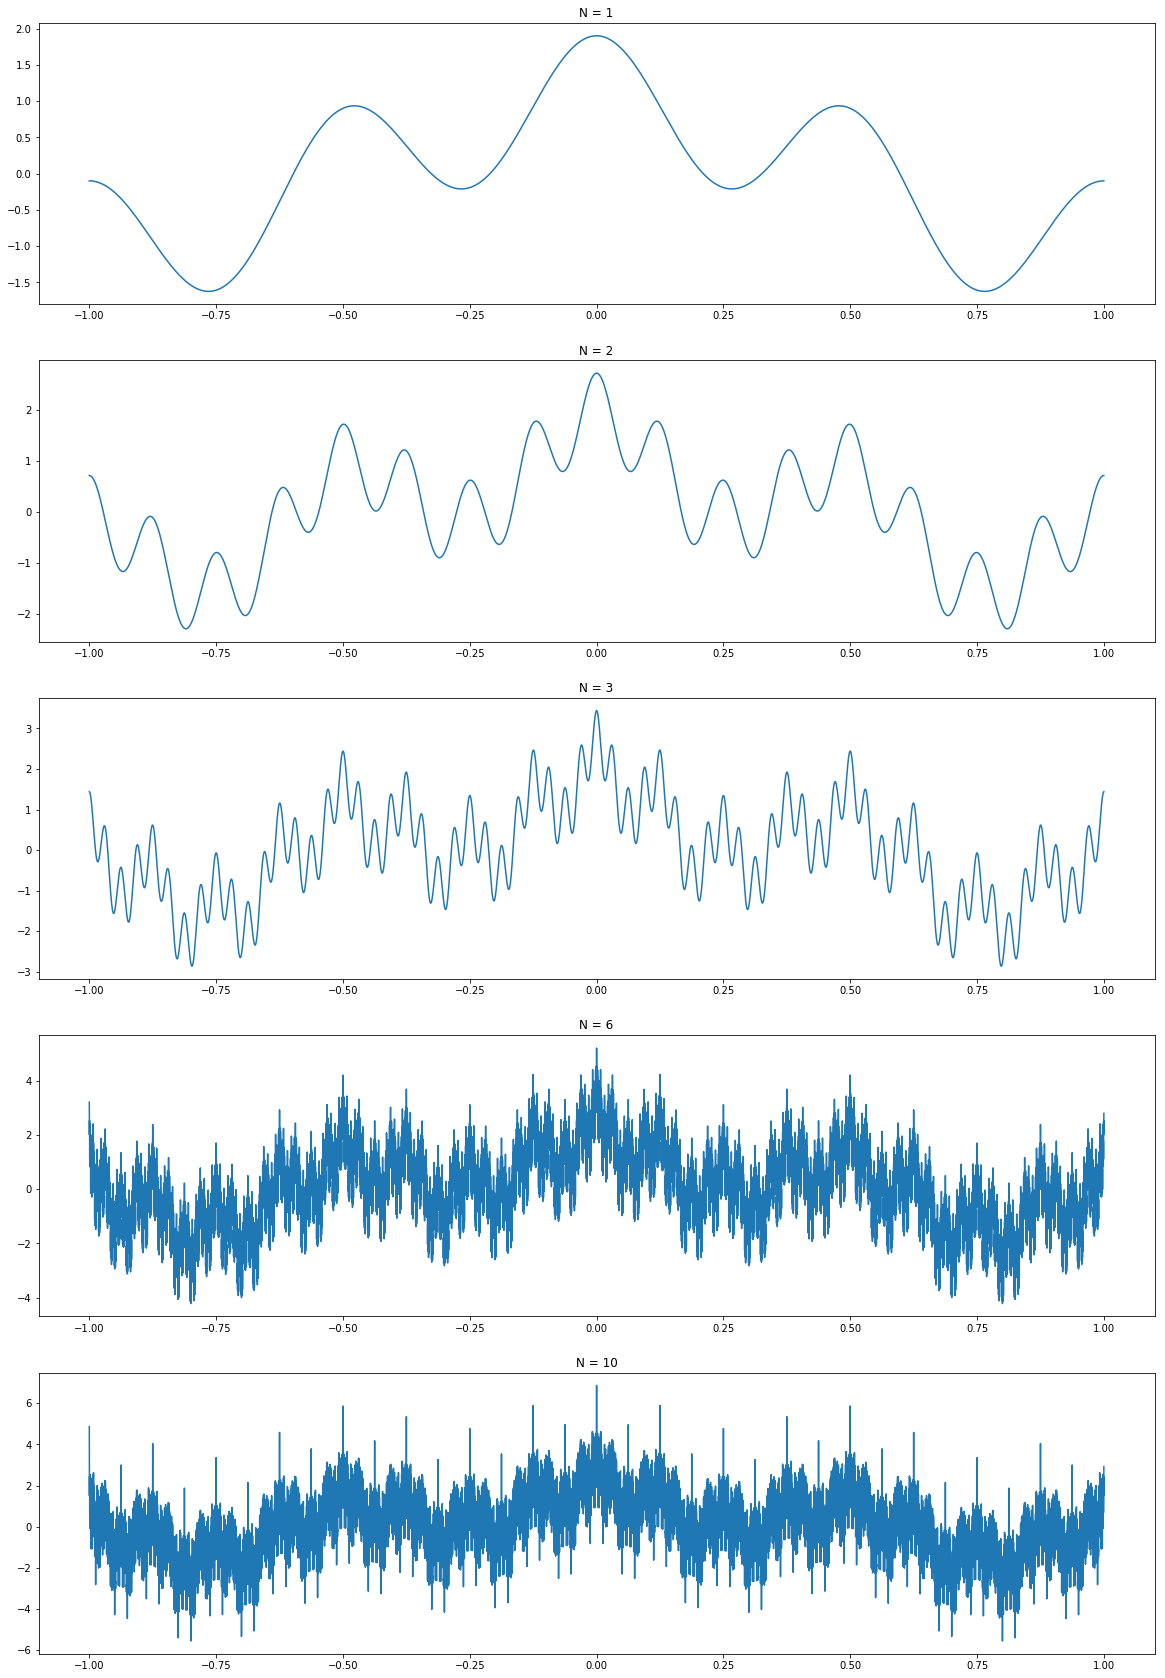

In [86]:
x = np.arange(-1, 1, 0.0001)
plt.figure(figsize=(20, 30))
plt.subplot(5, 1, 1)
plt.plot(x, W(1)(x))
plt.title("N = 1")
plt.subplot(5, 1, 2)
plt.plot(x, W(2)(x))
plt.title("N = 2")
plt.subplot(5, 1, 3)
plt.plot(x, W(3)(x))
plt.title("N = 3")
plt.subplot(5, 1, 4)
plt.plot(x, W(6)(x))
plt.title("N = 6")
plt.subplot(5, 1, 5)
plt.plot(x, W(10)(x))
plt.title("N = 10")

Clearly, larger N means that the function will be more difficult to approximate. 

In [10]:
# Define the model
x = tf.placeholder(tf.float32)
W1 = tf.Variable(tf.random_normal([1, 100]))
b1 = tf.Variable(tf.random_normal([100]))
y1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
y2 = tf.reduce_sum(y1, axis=1)

In [11]:
sess = tf.Session()
answer = tf.placeholder(tf.float32)
loss = tf.reduce_sum(tf.pow(answer - y2, 2))
step = tf.train.AdamOptimizer(1e-3).minimize(loss)
sess.run(tf.global_variables_initializer())
for i in range(30000):
    if i % 1000 == 0:
        print ("Step {} of {} --> loss = {}".format(i, 30000, \
                                sess.run(loss, feed_dict={x: np.expand_dims(xs, axis=1), answer: ys})))
    sess.run(step, feed_dict={x: np.expand_dims(xs, axis=1), answer: ys})

Step 0 of 30000 --> loss = 37167.9453125
Step 1000 of 30000 --> loss = 29231.974609375
Step 2000 of 30000 --> loss = 27703.873046875
Step 3000 of 30000 --> loss = 26333.890625
Step 4000 of 30000 --> loss = 25118.5234375
Step 5000 of 30000 --> loss = 24080.6328125
Step 6000 of 30000 --> loss = 23187.77734375
Step 7000 of 30000 --> loss = 22424.71484375
Step 8000 of 30000 --> loss = 21794.9765625
Step 9000 of 30000 --> loss = 21316.2421875
Step 10000 of 30000 --> loss = 20931.59765625
Step 11000 of 30000 --> loss = 20519.0546875
Step 12000 of 30000 --> loss = 20173.23828125
Step 13000 of 30000 --> loss = 19842.6875
Step 14000 of 30000 --> loss = 19576.6328125
Step 15000 of 30000 --> loss = 19360.345703125
Step 16000 of 30000 --> loss = 19174.8046875
Step 17000 of 30000 --> loss = 19014.9375
Step 18000 of 30000 --> loss = 18875.8984375
Step 19000 of 30000 --> loss = 18754.14453125
Step 20000 of 30000 --> loss = 18585.84375
Step 21000 of 30000 --> loss = 18461.5703125
Step 22000 of 30000 -

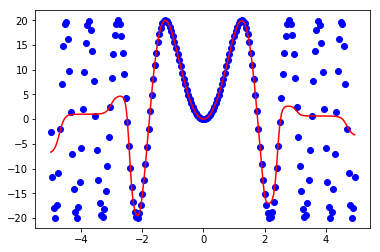

In [12]:
ys_model = sess.run(y2, feed_dict={x: np.expand_dims(xs, axis=1)})
plt.scatter(xs, ys, color='blue')
plt.plot(xs, ys_model, color='red')

As we can see from the above graph, I have succeeded somewhat in performing regression with a neural-network type object. The network consists of one hidden layer, of 100 neurons, using a tanh activation function, and a final output neuron which simply sums over the activations of the hidden layer. I used the AdamOptimizer with a step size of 1e-3, and used a difference-squared error function. More to come!